Name: Nguyen Quoc Dinh

Student ID: 300550781

In [1]:
!pip install SimPyClassic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.2/79.2 kB 733.5 kB/s eta 0:00:00a 0:00:01


In [2]:
####Assignment 2 - Programming

###Import packages
import random
import math
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import poisson
from SimPy.Simulation import *

In [3]:
###Q1. a. a random variate from a (x_k)^2 distribution
### (chi-square distribution with k degrees of freedom)
### (the sum of the squares of k independent standard normal random variates)

def chisquarevariate(k):
    """
    Generate a random variate from a chi-square dist. with k df
    """
    ss = 0.0
    for i in range(k):
        # step 1 - square
        # step 2 - sum up the random variates
        ss += (random.gauss(0,1))**2
    return ss

###Q1. b. For each k ∈ {1, 2, 3, 4, 5, 6, 7, 8, 9}, 
### simulate 10000 random variates X ~ (x_k)^2 to estimate E(X) and var(X)
print("1.b.")
X = []
n = 10000
df = np.arange(9)

random.seed(123)

for k in df:
    for i in range(n):
        X.append(chisquarevariate(k+1))
    E = np.mean(X)
    Var = np.var(X)
    
    print("[k = %d]: E(X) = %f, Var(X) = %f" % (k+1, E, Var))
    
###Q1. c. 95% CI for E(X) and a 95% CI for var(X) from 50 replications
print("1.c.")
X = []
reps = 50

for k in df:
    means = []
    variances = []
    for r in range(reps):
        for i in range(n):
            X.append(chisquarevariate(k+1))
        E = np.mean(X)
        Var = np.var(X)
        means.append(E)
        variances.append(Var)
    mean_CI = [np.quantile(means, 0.025), np.quantile(means, 0.975)]
    var_CI = [np.quantile(variances, 0.025), np.quantile(variances, 0.975)]

    print("[k = %d]: E(X) = %f [%f, %f], Var(X) = %f [%f, %f]" % (k+1, E, mean_CI[0], mean_CI[1], Var, var_CI[0], var_CI[1]))
    
    

1.b.
[k = 1]: E(X) = 1.014537, Var(X) = 1.996800
[k = 2]: E(X) = 1.510681, Var(X) = 3.288222
[k = 3]: E(X) = 2.002171, Var(X) = 4.656767
[k = 4]: E(X) = 2.503752, Var(X) = 6.267850
[k = 5]: E(X) = 2.999389, Var(X) = 7.990191
[k = 6]: E(X) = 3.493694, Var(X) = 9.826826
[k = 7]: E(X) = 3.993442, Var(X) = 11.937406
[k = 8]: E(X) = 4.497962, Var(X) = 14.304893
[k = 9]: E(X) = 5.003671, Var(X) = 16.777934
1.c.
[k = 1]: E(X) = 0.999649 [0.995674, 1.001660], Var(X) = 1.988703 [1.972317, 1.998629]
[k = 2]: E(X) = 1.500160 [1.041939, 1.493448], Var(X) = 3.240869 [2.113673, 3.225079]
[k = 3]: E(X) = 1.998287 [1.532977, 1.990100], Var(X) = 4.643933 [3.348828, 4.624255]
[k = 4]: E(X) = 2.496466 [2.027516, 2.487106], Var(X) = 6.208629 [4.747944, 6.184434]
[k = 5]: E(X) = 2.995725 [2.523637, 2.985819], Var(X) = 7.957572 [6.314981, 7.926698]
[k = 6]: E(X) = 3.497359 [3.022210, 3.487132], Var(X) = 9.894430 [8.073033, 9.860378]
[k = 7]: E(X) = 3.998102 [3.523491, 3.987524], Var(X) = 11.986076 [10.01991

Q1.d. Problem: compare your results from parts (b) and (c) to the exact values of E(X) and var(X) which you can find, e.g., on Wikipedia, and comment on your findings

Comparison: the results from parts (b) and (c) with the exact values of E(X) and var(X) from Wikipedia (https://en.wikipedia.org/wiki/Variance and https://en.wikipedia.org/wiki/Expected_value), we can see that the estimates from part (c) are generally closer to the true values than the estmateds from part (b).

Comment: 

- This is expected since the estimates from part (c) are based on larger samples (i.e., 50 replications of 10k observations each), and thus have less sampling error than the estimates from part (c) (i.e., 1 replication of 10k observations)
- Overall, both sets of estimates appear to be fairly accurate, with the estimates from part (c) being slightly more precise (i.e., having narrower confidence intervals) than the estimates from part (b). 
- As k increases, both mean(X) and var(X) also increase, which is consistent with the properties of the chi-squared distribution.

The probability of 28 customers coming to that shop in a day: 0.0354 (approximately 3.54%)


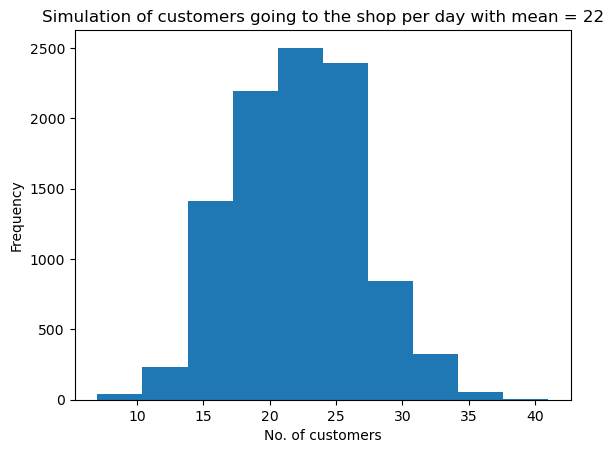

In [4]:
from scipy.stats import poisson

###Q2.a. Compute analytically the probability of 28 customers coming to that shop in a day

# mean of Poisson dist.
mean = 22
# number of customers we're interested in
k = 28
# probability mass function at k = 28
# probability of k customers coming to the shop in a day
prob = poisson.pmf(k, mean)
print(
    "The probability of {} customers coming to that shop in a day: {:,.4f} (approximately {:,.2f}%)".format(k, prob, prob*100)
)

###Q2.b. simulation by generating 10k random variates from a Poisson dist. 
###Plot the frequency of #customers 

random.seed(123)
n = 10000

# equivalent to poisson.rvs(mean, size = n): a Poisson discrete random variable
simulated_customers = np.random.poisson(mean, n)

plt.hist(simulated_customers)
plt.xlabel("No. of customers")
plt.ylabel("Frequency")
plt.title("Simulation of customers going to the shop per day with mean = {}".format(mean))
plt.show()

In [5]:
###Q3. a SimPy simulation program to describe the behaviors: 
###Kathy at an museum, assuming that no other visitors arrive while she's there
###3 displays: 0, 1, 2
###Kathy enters the museum at time 0 and only has time to see 2 of them
###chooses display 1 (p=0.4), display 2 (1-p)

class Visitor(Process):
    """A museum visitor who only wants to see two out of three displays"""
    def visit(self):
        count = 0
        is_display2 = random.random() > p
        
        print(now(), self.name, 'Looking display 0')
        for display in range(Ndisplays):
            if count >= 2:
                break
            
            if is_display2 and display == 1:
                continue
                
            yield hold, self, displayTime[display]
            print("%s %s is looking display %d" % (now(), self.name, display))
            
            count += 1
        print(now(), self.name, 'is exiting the museum')

## Experiment data --------------
Ndisplays = 3
#times taken to look at the 3 displays
displayTime = [4.5, 5.5, 7.5]
p = 0.4

## Experiment --------------------
random.seed(123)

initialize()
kathy = Visitor('Kathy')
activate(kathy, kathy.visit(), now())
simulate(until = 2000)

0 Kathy Looking display 0
4.5 Kathy is looking display 0
10.0 Kathy is looking display 1
10.0 Kathy is exiting the museum


'SimPy: No more events at time 10.0'